<font size="+3" color="#000000"><b>Heart Disease Prediction</b></font>

<div style="text-align: center;">
    <img src="https://i2.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/05/Untitled-57.png?fit=580%2C283&ssl=1" alt="Flight Price Prediction" width="750px" /> 
</div>


In [1]:
def basicProjectInfo(fileName):
    df = pd.read_csv(fileName)
    return df

def info(df):
    return df.info()

def checkNull(df):
    return df.isnull().sum()

def dropNull(df):
    return df.dropna(inplace=True)

def custom_fillna(df):
    column = input("Enter the column name to fill NaN values (press Enter for all columns): ")

    if column == '':
        # If no specific column is provided, fill NaN values in all columns
        method = input("Enter the fill method (e.g., 'ffill', 'bfill', 'pad', 'backfill', 'nearest', 'mean', 'mode', 'None'): ")
        if method.lower() == 'none':
            value = input("Enter the value to fill NaN (e.g., '0', 'unknown'): ")
            df.fillna(value=value, inplace=True)
        elif method.lower() == 'mean':
            df.fillna(df.mean(), inplace=True)
        elif method.lower() == 'mode':
            df.fillna(df.mode().iloc[0], inplace=True)
        else:
            df.fillna(method=method, inplace=True)
    else:
        # If a specific column is provided, fill NaN values in that column
        method = input("Enter the fill method (e.g., 'ffill', 'bfill', 'pad', 'backfill', 'nearest', 'None'): ")
        if method.lower() == 'none':
            value = input("Enter the value to fill NaN in '{}' column (e.g., '0', 'unknown'): ".format(column))
            df[column].fillna(value=value, inplace=True)
        else:
            df[column].fillna(method=method, inplace=True)

    return df
    
    
def custom_replace(df, to_replace, value):
    if value.lower() == 'nan':
        # If value is 'nan' (case-insensitive), replace directly without converting columns
        df.replace(to_replace=to_replace, value=np.nan, inplace=True)
    elif isinstance(value, (int, float, np.number)):
        # If value is numeric, convert columns to numeric type
        df = df.apply(pd.to_numeric, errors='ignore')
        df.replace(to_replace=to_replace, value=value, inplace=True)
    else:
        # If value is a string or other type, replace directly without converting columns
        df.replace(to_replace=to_replace, value=value, inplace=True)
    
    return df
    
def custom_rename(df):
    column_mapping = {}
    
    while True:
        existing_column = input("Enter the existing column name (press Enter to finish): ").strip()
        if not existing_column:
            break
        new_column = input("Enter the new column name: ")
        column_mapping[existing_column] = new_column

    if column_mapping:
        df.rename(columns=column_mapping, inplace=True)
        return df
    else:
        print("No column names provided. DataFrame remains unchanged.")
        return df

def dropColumns(df,columnList):
    df.drop(columns = columnList,axis=1,inplace = True)
    return df

def dropNull(df):
    df.dropna(inplace=True)
    return df

def categoryChange(df, columnMap):
    for column, dtype_param in columnMap.items():
        if dtype_param == 'date':
            df[column] = pd.to_datetime(df[column])
        else:
            df[column] = df[column].astype(dtype_param)
    return df

def addColumns(df, new_column_name):
    if new_column_name in ['Day', 'Week', 'Month', 'Year']:
        # If the new column name is one of 'Day', 'Week', 'Month', or 'Year'
        date_column = input("Enter the name of the date column: ")
        if date_column in df.columns and pd.api.types.is_datetime64_any_dtype(df[date_column]):
            if new_column_name == 'Day':
                df[new_column_name] = df[date_column].dt.day
            elif new_column_name == 'Week':
                df[new_column_name] = df[date_column].dt.isocalendar().week
            elif new_column_name == 'Month':
                df[new_column_name] = df[date_column].dt.month
            elif new_column_name == 'Year':
                df[new_column_name] = df[date_column].dt.year
        else:
            print("Invalid date column name or not a valid date column.")
    else:
        # If the new column name is different, ask the user for values
        values = input(f"Enter values for the new column '{new_column_name}' (comma-separated): ").split(',')
        df[new_column_name] = values

    return df

       
def outlierDtection(df):
     box_plot(df, hue=None, xlabel=None, title=None)
    
def outlierRemoval(df, method, columns):
    if method == 'drop':
        for col in columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    elif method == 'cap':
        for col in columns:
            lower = df[col].quantile(0.25)
            upper = df[col].quantile(0.75)
            IQR = upper - lower
            upperLimit = upper + 1.5 * IQR
            lowerLimit = lower - 1.5 * IQR
            df[col] = np.where(df[col] > upperLimit, upperLimit, np.where(df[col] < lowerLimit, lowerLimit, df[col]))

    return df

In [2]:
def create_condition(column_name, operator, value):
    # Convert the provided value based on the column dtype
    column_dtype = df[column_name].dtype
    if pd.api.types.is_numeric_dtype(column_dtype):
        try:
            value = pd.to_numeric(value)
        except (ValueError, TypeError):
            raise ValueError(f"Invalid value: {value}. Cannot convert to numeric.")
    else:
        # If the column is not numeric, keep the value as a string
        value = str(value)  

    if operator == '==':
        return df[column_name] == value
    elif operator == '!=':
        return df[column_name] != value
    elif operator == '>':
        return df[column_name] > value
    elif operator == '<':
        return df[column_name] < value
    elif operator == '>=':
        return df[column_name] >= value
    elif operator == '<=':
        return df[column_name] <= value
    else:
        raise ValueError(f"Invalid operator: {operator}. Use '==', '!=', '>', '<', '>=', '<='.")

def get_user_condition():
    column_name = input("Enter column name: ").strip()
    operator = input("Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ").strip()
    value = input("Enter value: ").strip()

    return create_condition(column_name, operator, value)

def apply_user_conditions(df):
    conditions = []
    logical_operator = 'and'  # Initialize logical_operator outside the loop
    
    while True:
        condition = get_user_condition()
        conditions.append(condition)

        apply_more = input("Do you want to apply more conditions? (yes/no): ").strip().lower()
        if apply_more == 'yes':
            logical_operator = input("Enter logical operator ('and' or 'or'): ").strip().lower()
        else:
            break

        if logical_operator not in ['and', 'or']:
            raise ValueError(f"Invalid logical operator: {logical_operator}. Use 'and' or 'or'.")

    if logical_operator == 'and':
        result_condition = pd.Series(True, index=df.index)
        for cond in conditions:
            result_condition = result_condition & cond
    elif logical_operator == 'or':
        result_condition = pd.Series(False, index=df.index)
        for cond in conditions:
            result_condition = result_condition | cond

    # Apply the combined condition to filter the DataFrame
    result_df = df[result_condition]
    return result_df

In [3]:
def grouping(df):
    
    
    group_columns = [col.strip().replace("'", "") for col in input("Enter group columns separated by commas: ").split(',')]

   
    aggregation_map = {}
    while True:
        column_name = input("Enter column for aggregation (or type 'done' to finish): ").strip()
        if column_name.lower() == 'done':
            break

        aggregation_function = input(f"Enter aggregation function for {column_name} (e.g., 'sum', 'mean', 'count'): ").strip()
        alias = input(f"Enter alias for {column_name}: ").strip()

        aggregation_map[alias] = (column_name, aggregation_function)

   
    sort_columns = [col.strip().replace("'", "") for col in input("Enter columns for sorting separated by commas: ").split(',')]
    sort_order = input("Enter sorting order ('asc' or 'desc'): ").strip()
    if sort_order=='asc':
        order = True
    else:
        order = False

  
    column_tuple = list(aggregation_map.values())
    
    
    grouped_df = df.groupby(group_columns).agg(dict(column_tuple)).sort_values(by=sort_columns, ascending=order)

    
    grouped_df.reset_index(inplace=True)

    return grouped_df



<font color="#FF8C00"><h2>Funtions for Graphs</font>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def pie_plot(df, values):
    value_counts = df[values].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Plot of {values}')
    plt.show()

    plt.show()

def count_plot(df, x, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.countplot(x=x, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def kde_plot(df, x, xlabel=None, title=None):
    sns.kdeplot(data=df, x=x, fill=True)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

def scatter_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.scatterplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def regression_plot(df, x, y, xlabel=None, ylabel=None, title=None):
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def heatmap(df, xlabel=None, ylabel=None, title=None):
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def box_plot(df, hue=None, xlabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.boxplot(data=df, x=hue)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def rel_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.relplot(x=x, y=y, hue=hue, data=df, kind='line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def choose_plot():
    print("Choose a plot type:")
    print("1. Bar Plot")
    print("2. Pie Plot")
    print("3. Count Plot")
    print("4. KDE Plot")
    print("5. Scatter Plot")
    print("6. Regression Plot")
    print("7. Heatmap")
    print("8. Box Plot")
    print("9. Relational Plot")
    
    choice = input("Enter the number corresponding to your choice: ")

    if not choice.isdigit() or int(choice) not in range(1, 10):
        print("Invalid choice. Please enter a number between 1 and 9.")
        return

    choice = int(choice)
    if choice == 1:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        bar_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 2:
        values = input("Enter the name of the values variable: ")
        pie_plot(df, values)
        
    elif choice == 3:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        count_plot(df, x, hue, xlabel, ylabel, title)
        
    elif choice == 4:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        kde_plot(df, x, xlabel, title)
        
    elif choice == 5:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        scatter_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 6:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        regression_plot(df, x, y, xlabel, ylabel, title)
        
    elif choice == 7:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        heatmap(df, xlabel, ylabel, title)
        
    elif choice == 8:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        box_plot(df, hue, xlabel, title)
        
    elif choice == 9:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        rel_plot(df, x, y, hue, xlabel, ylabel, title)
    else:
        print("Invalid choice. Please enter a number between 1 and 9.")


In [5]:
def custom_train_test_split(data):

    target_column = input("Enter the target variable column name: ")
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")
    test_size = float(input("Enter the test size (as a decimal between 0.0 and 1.0): "))
    random_state_str = input("Enter the random state (optional, press Enter to use default 10): ")
    random_state = int(random_state_str) if random_state_str else 10
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def custom_encoding(y_train,y_test):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    return y_train,y_test

In [6]:
def custom_transform(X_train,X_test):
    # Get user input for columns to apply different transformers
    power_columns = input("Enter columns to apply Power Transformer (comma-separated, press Enter to skip): ")
    function_columns = input("Enter columns to apply Function Transformer (comma-separated, press Enter to skip): ")
    ohe_columns = input("Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): ")
    ordinal_columns = input("Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): ")
    standard_columns = input("Enter columns to apply StandardScaler (comma-separated, press Enter to skip): ")

    # Process input for Power Transformer
    power_columns = [col.strip() for col in power_columns.split(',') if col.strip()]
    if not power_columns:
        power_columns = None

    # Process input for Function Transformer
    function_columns = [col.strip() for col in function_columns.split(',') if col.strip()]
    if not function_columns:
        function_columns = None

    # Process input for OneHotEncoder
    ohe_columns = [col.strip() for col in ohe_columns.split(',') if col.strip()]
    if not ohe_columns:
        ohe_columns = None

    # Process input for Ordinal Encoder
    ordinal_columns = [col.strip() for col in ordinal_columns.split(',') if col.strip()]
    if not ordinal_columns:
        ordinal_columns = None

    # Process input for StandardScaler
    standard_columns = [col.strip() for col in standard_columns.split(',') if col.strip()]
    if not standard_columns:
        standard_columns = None

    # Define the transformers
    transformers = [
        ('power', PowerTransformer(), power_columns),
        ('function', FunctionTransformer(np.log1p), function_columns),
        ('ohe', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), ohe_columns),
        ('ordinal', OrdinalEncoder(), ordinal_columns),
        ('standard', StandardScaler(), standard_columns)
    ]

    # Filter out transformers with None columns
    transformers = [(name, transformer, columns) for name, transformer, columns in transformers if columns is not None]

    # Define the ColumnTransformer
    preprocessor = ColumnTransformer(transformers)

    # Create a pipeline with the ColumnTransformer and any additional steps
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Assuming 'data' is your DataFrame
    # Fit and transform the training data
    X_train = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test = pipeline.transform(X_test)

    return X_train, X_test

In [7]:
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def decision_tree(X_train, y_train, X_test, params=None):
    model = DecisionTreeRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def random_forest(X_train, y_train, X_test, params=None):
    model = RandomForestRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def knn(X_train, y_train, X_test, params=None):
    model = KNeighborsRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def support_vector_machine(X_train, y_train, X_test, params=None):
    model = SVR()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def xgboost(X_train, y_train, X_test, params=None):
    model = XGBRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def logistic_regression(X_train, y_train, X_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def decision_tree_classifier(X_train, y_train, X_test, params=None):
    model = DecisionTreeClassifier()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def random_forest_classifier(X_train, y_train, X_test, params=None):
    model = RandomForestClassifier()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def naive_bayes(X_train, y_train, X_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


In [8]:
def select_model():
    print("Select a model:")
    print("1. Linear Regression")
    print("2. Logistic Regression")
    print("3. Decision Tree Regressor")
    print("4. Random Forest Regressor")
    print("5. k-Nearest Neighbors Regressor")
    print("6. Support Vector Machine Regressor")
    print("7. XGBoost Regressor")
    print("8. Decision Tree Classifier")
    print("9. Random Forest Classifier")
    print("10. Naive Bayes")

    choice = int(input("Enter the number corresponding to your choice: "))
    return choice

def get_hyperparameters(model_choice):
    if model_choice in [1, 2, 6, 7]:
        return None
    elif model_choice in [3, 4, 8, 9]:
        max_depths = input("Enter max depths (comma-separated): ").split(',')
        return {'max_depth': [int(depth) for depth in max_depths]}
    elif model_choice == 5:
        return {'n_neighbors': int(input("Enter the number of neighbors: "))}
    elif model_choice == 10:
        return None

def evaluate_model(y_actual, y_pred, classification=False):
    if classification:
        report_dict = classification_report(y_actual, y_pred, output_dict=True)
        accuracy = report_dict.pop('accuracy', None)  # Extract accuracy from the dictionary
        report_dict['accuracy'] = accuracy
        return report_dict
    else:
        r2 = r2_score(y_actual, y_pred)
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        return {'R2 Score': r2, 'RMSE': rmse}
    
def model_evaluation_df(y_actual, y_pred, model_name, classification):
    if classification:
        classification_report_dict = classification_report(y_actual, y_pred, output_dict=True)
        df_classification_report = pd.DataFrame(classification_report_dict).transpose()
        print(df_classification_report)
        
        # Plot confusion matrix
        cm = confusion_matrix(y_actual, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Adjust display_labels as needed
        disp.plot()

        # You can also customize the plot further if needed
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        plt.show()
    else:
        # Assuming y_actual and y_pred are DataFrame columns
        regression_plot(pd.DataFrame({ 'y_actual': y_actual, 'y_pred': y_pred }), 'y_actual', 'y_pred', xlabel=None, ylabel=None, title=None)

    evaluation_dict = evaluate_model(y_actual, y_pred, classification)
    evaluation_dict['Model'] = model_name
    df = pd.DataFrame(evaluation_dict, index=[0])
    return df


def hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice):
    hyperparameters = get_hyperparameters(model_choice)

    is_classification = input("Is this a classification problem? (yes/no): ").strip().lower()
    classification = is_classification == 'yes'

    if model_choice == 1:
        y_pred = linear_regression(X_train, y_train, X_test)
        model_name = 'Linear Regression'
    elif model_choice == 2:
        y_pred = logistic_regression(X_train, y_train, X_test)
        model_name = 'Logistic Regression'
    elif model_choice == 3:
        y_pred = decision_tree(X_train, y_train, X_test, hyperparameters)
        model_name = 'Decision Tree Regressor'
    elif model_choice == 4:
        y_pred = random_forest(X_train, y_train, X_test, hyperparameters)
        model_name = 'Random Forest Regressor'
    elif model_choice == 5:
        y_pred = knn(X_train, y_train, X_test, hyperparameters)
        model_name = 'k-Nearest Neighbors Regressor'
    elif model_choice == 6:
        y_pred = support_vector_machine(X_train, y_train, X_test, hyperparameters)
        model_name = 'Support Vector Machine Regressor'
    elif model_choice == 7:
        y_pred = xgboost(X_train, y_train, X_test, hyperparameters)
        model_name = 'XGBoost Regressor'
    elif model_choice == 8:
        y_pred = decision_tree_classifier(X_train, y_train, X_test, hyperparameters)
        model_name = 'Decision Tree Classifier'
    elif model_choice == 9:
        y_pred = random_forest_classifier(X_train, y_train, X_test, hyperparameters)
        model_name = 'Random Forest Classifier'
    elif model_choice == 10:
        y_pred = naive_bayes(X_train, y_train, X_test)
        model_name = 'Naive Bayes'

    df = model_evaluation_df(y_test, y_pred, model_name, classification)
    return df

In [9]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [10]:
file_name = input("Enter the CSV file name: ")
df = basicProjectInfo(file_name)
df

Enter the CSV file name: dataset.csv


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [11]:
checkNull(df)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#To rename columns
#df = custom_rename(df)
#df

In [14]:
# To repalce any value in the dataFrame
#to_replace = input("Enter the value to be replace: ")
#value = input("Enter the new value  ")
#df = custom_replace(df, to_replace, value)
#df

In [46]:
#To fill null values
#uncomment if you want to fill null values
#df = custom_fillna(df)
#df

In [15]:
# Drop columns
#columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
#df = dropColumns(df, columns_to_drop)
#print("\nDataFrame after dropping columns:")
#df


In [16]:
# Drop null values
#df = dropNull(df)
#df


In [11]:
# Category change
#uncomment if you want to change dtype
#column_map = {'DateColumn': 'date', 'CategoryColumn': 'category'}
#df = categoryChange(df, column_map)
#print("\nDataFrame after category change:")
#print(df.head())


In [12]:
# Add columns
#uncomment if you want to add columns
#addColumns(df, new_column_name))
#df.head()

In [17]:
# Outlier detection and removal
#outlierDtection(df)

In [18]:
#uncommnent if you want to drop outliers
#columns = input("Enter columns to treat (comma-separated): ").split(',')
#method = input("Enter how to treat outlier drop/cap: ")
#df = outlierRemoval(df, method, columns)
#df

In [19]:
# Outlier detection and removal
#outlierDtection(df)

Filtering


In [20]:
#result_df = apply_user_conditions(df)
#result_df

In [ ]:
# Apply user-defined grouping
#result_df = grouping(df)
#result_df

In [21]:
# Visualization
#choose_plot()

In [27]:
#Train Test Split
X_train, X_test, y_train, y_test = custom_train_test_split(df)

Enter the target variable column name: target
Enter the test size (as a decimal between 0.0 and 1.0): 0.2
Enter the random state (optional, press Enter to use default 10): 12


In [31]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
238   77    1   0       125   304    0        0      162      1      0.0   
224   54    1   0       110   239    0        1      126      1      2.8   
31    65    1   0       120   177    0        1      140      0      0.4   
139   64    1   0       128   263    0        1      105      1      0.2   
47    47    1   2       138   257    0        0      156      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
259   38    1   3       120   231    0        1      182      1      3.8   
130   54    0   2       160   201    0        1      163      0      0.0   
241   59    0   0       174   249    0        1      143      1      0.0   
253   67    1   0       100   299    0        0      125      1      0.9   
155   58    0   0       130   197    0        1      131      0      0.6   

     slope  ca  thal  
238      2   3     2  
224      1   1     3  
31       2   0     3  
139      1   1     3  
47       2   0     2  
..     ...  ..   ...  
259      1   0     3  
130      2   1     2  
241      1   0     2  
253      1   2     2  
155      1   0     2  

[242 rows x 13 columns]

In [30]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [32]:
#applying transformers on feature varaiables

X_train, X_test = custom_transform(X_train, X_test)

Enter columns to apply Power Transformer (comma-separated, press Enter to skip): age,sex,thalach,slope,thal
Enter columns to apply Function Transformer (comma-separated, press Enter to skip): trestbps,chol,fbs,exang,oldpeak,ca
Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): 
Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): 
Enter columns to apply StandardScaler (comma-separated, press Enter to skip): 


In [34]:
# applying encoding on target variables
#y_train, y_test = custom_encoding(y_train,y_test)

In [33]:
X_train

array([[ 2.5341807 ,  0.68313005,  0.52613179, ...,  0.69314718,
         0.        ,  1.38629436],
       [-0.03526009,  0.68313005, -1.07735104, ...,  0.69314718,
         1.33500107,  0.69314718],
       [ 1.16923993,  0.68313005, -0.50195982, ...,  0.        ,
         0.33647224,  0.        ],
       ...,
       [ 0.50629212, -1.46385011, -0.37068958, ...,  0.69314718,
         0.        ,  0.        ],
       [ 1.39322585,  0.68313005, -1.11610765, ...,  0.69314718,
         0.64185389,  1.09861229],
       [ 0.3971644 , -1.46385011, -0.8788845 , ...,  0.        ,
         0.47000363,  0.        ]])

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(242, 11)
(61, 11)
(242,)
(61,)


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 2
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score    support
0              0.793103  0.741935  0.766667  31.000000
1              0.750000  0.800000  0.774194  30.000000
accuracy       0.770492  0.770492  0.770492   0.770492
macro avg      0.771552  0.770968  0.770430  61.000000
weighted avg   0.771905  0.770492  0.770368  61.000000


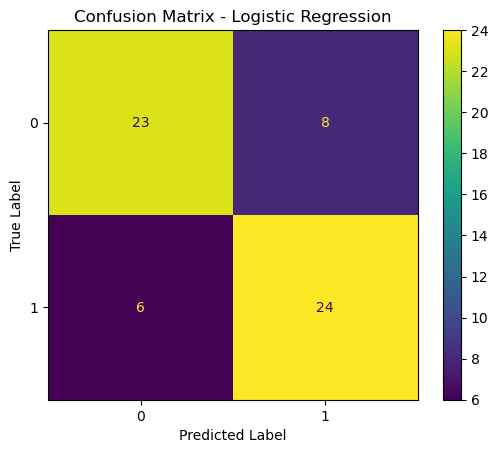

0   1  macro avg  weighted avg  accuracy                Model
0 NaN NaN        NaN           NaN  0.770492  Logistic Regression

In [35]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df

Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 8
Enter max depths (comma-separated): 2,3,5
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score    support
0              0.703704  0.612903  0.655172  31.000000
1              0.647059  0.733333  0.687500  30.000000
accuracy       0.672131  0.672131  0.672131   0.672131
macro avg      0.675381  0.673118  0.671336  61.000000
weighted avg   0.675846  0.672131  0.671071  61.000000


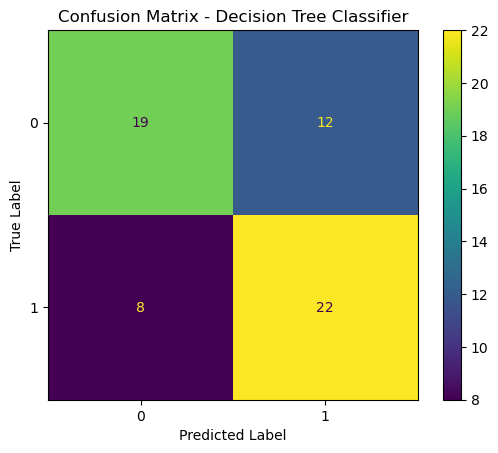

0   1  macro avg  weighted avg  accuracy                     Model
0 NaN NaN        NaN           NaN  0.672131  Decision Tree Classifier

In [36]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 9
Enter max depths (comma-separated): 2,3,4,5
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score    support
0              0.800000  0.774194  0.786885  31.000000
1              0.774194  0.800000  0.786885  30.000000
accuracy       0.786885  0.786885  0.786885   0.786885
macro avg      0.787097  0.787097  0.786885  61.000000
weighted avg   0.787308  0.786885  0.786885  61.000000


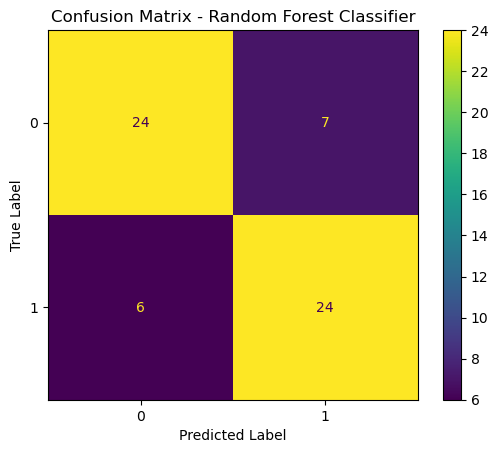

0   1  macro avg  weighted avg  accuracy                     Model
0 NaN NaN        NaN           NaN  0.786885  Random Forest Classifier

In [37]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df
